#### 라이브러리 버전
판다스 버전 : 1.3.4<br>
넘파이 버전 : 1.21.5<br>
kiwipiepy 버전 : 0.17.0<br>
seaborn 버전 : 0.11.2<br>
konlpy 버전 : 0.6.0

In [1]:
#1장에서 konlpy를 설치하지 않았다면 아래 주석을 해제하고, 설치해주세요.
#1장에서 설치했다면 패스합니다.
#!pip install konlpy==0.6.0

In [2]:
# 라이브러리 버전이 맞지 않을 경우 아래 명령어의 주석을 제거한 후 실행해주세요.
# 이전 예제들을 실행했다면 앞에서 이미 버전을 맞췄습니다.
# !pip install pandas==1.3.4
# !pip install numpy==1.21.5
# !pip install seaborn=0.11.2
# !pip install kiwipiepy==0.17.0

In [3]:
# 버전 확인용
import pandas as pd
import numpy as np
import kiwipiepy
import seaborn as sns
import konlpy

print("판다스 버전 :", pd.__version__)
print("넘파이 버전:", np.__version__)
print("kiwipiepy 버전 :", kiwipiepy.__version__)
print("seaborn 버전 :", sns.__version__)
print("konlpy 버전 :", konlpy.__version__)

판다스 버전 : 1.3.4
넘파이 버전: 1.21.5
kiwipiepy 버전 : 0.17.0
seaborn 버전 : 0.11.2
konlpy 버전 : 0.6.0


필요란 라이브러리 불러오기

In [4]:
import re

import pandas as pd
import numpy as np

from kiwipiepy import Kiwi
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import seaborn as sns
import calendar
from dateutil.parser import parse

from collections import Counter
from konlpy.tag import Komoran, Okt, Twitter
from pprint import pprint

In [5]:
filepath = './data'
df = pd.read_excel(filepath + "/2장_여성커뮤니티데이터.xlsx")

In [6]:
df.head()

,title,replys,views,date
0,강남다이어트 하체살빼기 셀룰라이트 제거부터 확실히 라인이 달라졌어요,2,391,2022.04.05.
1,발렌티노 쿠션과 입생로랑 쿠션 두개 다 써 보신 분 계실까요?,1,162,2022.04.05.
2,눈썹 반영규 궁금해요!,8,87,2022.04.05.
3,필테 헬스병행,4,90,2022.04.05.
4,남편 피부관리 해주시는 분들,10,109,2022.04.05.


데이터 분석 -게시물 날짜 정보 구하기

In [7]:
date_sample = "2022.02.26"

print(parse(date_sample).year)#① # 연도를 추출합니다.
print(parse(date_sample).month)#② # 월을 추출합니다.
print(parse(date_sample).day)#③ # 일을 추출합니다

2022
2
26


In [8]:
df['year'] = df['date'].apply(lambda x:parse(x).year) # ①
df['month'] = df['date'].apply(lambda x:parse(x).month)
df['day'] = df['date'].apply(lambda x:parse(x).day)

In [9]:
# 2022년 2월 26일 이라면
calendar.weekday(2022, 2, 26) # ① 요일찾기

5

In [10]:
posting_days = [] #요일 정보 저장
for y, m, d in zip(df['year'], df['month'], df['day']): # ①
    days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
    day = days[calendar.weekday(y, m, d)] # ②
    posting_days.append(day) # ③

df['Date_Created'] = posting_days # ④

In [11]:
df.sample(5)

,title,replys,views,date,year,month,day,Date_Created
16313,엄마가 집에서 운동하시는데,11,198,2019.01.08.,2019,1,8,화요일
12254,설화수 방판하시는분 계신가요오?,0,89,2019.05.14.,2019,5,14,화요일
3389,환절기 두피 각질고민... 해결법 좀 알려주세요,6,165,2021.04.27.,2021,4,27,화요일
2555,번지피지오 하시는분들~,4,230,2021.07.18.,2021,7,18,일요일
4964,샬랑드파리 아이디 있으신 분~',1,106,2020.12.02.,2020,12,2,수요일


In [12]:
df['month'].value_counts().sort_index()

1     2117
2     1969
3     2184
4     1724
5     1304
6     1165
7     1149
8     1108
9      950
10     971
11    1021
12     997
Name: month, dtype: int64

In [13]:
df['month'].value_counts()

3     2184
1     2117
2     1969
4     1724
5     1304
6     1165
7     1149
8     1108
11    1021
12     997
10     971
9      950
Name: month, dtype: int64

In [14]:
df['Date_Created'].value_counts()

화요일    2981
월요일    2880
목요일    2792
수요일    2652
금요일    2580
일요일    1459
토요일    1315
Name: Date_Created, dtype: int64

(0.0, 2500.0)

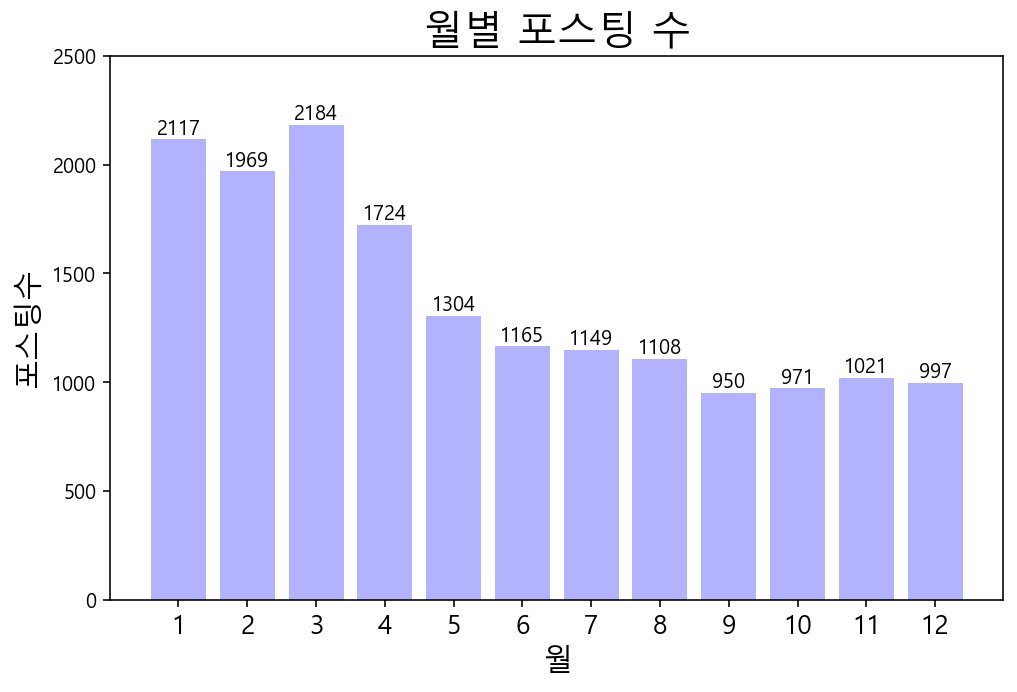

In [15]:
y = df['month'].value_counts().sort_index().values # ①
x = np.arange(1,13)

plt.figure(figsize=(8, 5)) # ②
plt.title("월별 포스팅 수", size=20) # ③
plt.bar(x, y, color='blue', alpha=0.3) # ④

for i, v in enumerate(x): # ⑤
    plt.text(i+1, y[i], y[i], verticalalignment='bottom',
             horizontalalignment='center')

plt.xticks(np.arange(1,13), size=13) # ⑥
plt.xlabel("월", size=15)
plt.ylabel("포스팅수", size=15)
plt.ylim(0, 2500)

데이터 분석 - 포스팅 랭킹 구하기

In [16]:
df['reply_rank'] = df['replys'].rank(ascending=False)
df.sort_values(by='reply_rank', ascending=True) # ①

,title,replys,views,date,year,month,day,Date_Created,reply_rank
1222,리프팅 수술 후 살이 찌면..,932,2.4만,2021.11.27.,2021,11,27,토요일,1.0
12439,펑,910,"7,894",2019.05.06.,2019,5,6,월요일,2.0
13881,비염에 좋다해서 질렀어요~,635,1.1만,2019.03.17.,2019,3,17,일요일,3.0
179,"피부과 시술 좋아하고 많이 받아봐서, 궁금한거 있음 물어보세요!",612,1.6만,2022.03.17.,2022,3,17,목요일,4.0
14562,비염에 좋다고 해서 구매해봄~~~,560,1.4만,2019.02.24.,2019,2,24,일요일,5.0
...,...,...,...,...,...,...,...,...,...
14899,석류즙 먹고 효과보신 분 추천해 주셔요,0,167,2019.02.15.,2019,2,15,금요일,15587.5
14900,슈링크 시술 후,0,598,2019.02.15.,2019,2,15,금요일,15587.5
13226,부산 장전래미안 앞 아라네일 오픈이벤트 중이예요,0,89,2019.04.04.,2019,4,4,목요일,15587.5
14894,닥터헤디* 엠플세럼 벌써 이만큼이나ㅜ,0,41,2019.02.15.,2019,2,15,금요일,15587.5


In [17]:
def calc_View(count):
    """입력된 조회수 값을 숫자로 변환한다"""
    if '만' in count:
        cnt = float(count.replace('만', ''))*10000 # ①
        return cnt

    elif "," in count:
        cnt = float(count.replace(',','')) # ②
        return cnt

    else:
        cnt = float(count) # ③
        return cnt

df['views']=df['views'].astype('str') # ④
df['views']=df['views'].apply(lambda x:calc_View(x))

In [18]:
df.head(3)

,title,replys,views,date,year,month,day,Date_Created,reply_rank
0,강남다이어트 하체살빼기 셀룰라이트 제거부터 확실히 라인이 달라졌어요,2,391.0,2022.04.05.,2022,4,5,화요일,12157.0
1,발렌티노 쿠션과 입생로랑 쿠션 두개 다 써 보신 분 계실까요?,1,162.0,2022.04.05.,2022,4,5,화요일,13799.0
2,눈썹 반영규 궁금해요!,8,87.0,2022.04.05.,2022,4,5,화요일,5108.5


In [19]:
df['view_rank'] = df['views'].rank(ascending=False)
df.sort_values(by='view_rank', ascending=True)

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank
16471,"필독!!! 정치글금지! 주의 / 분란, 이슈, 정치, 욕, 반말등 [글,덧글 금지]",0,560000.0,2020.08.21.,2020,8,21,금요일,15587.5,1.0
16470,"진행중▶ 체험단, 이벤트 안내 / 4월4일 부터 ~ 4월10일 까지",0,420000.0,2020.12.14.,2020,12,14,월요일,15587.5,2.0
281,김혜수 얼마나 소식하는걸까요,66,28000.0,2022.03.04.,2022,3,4,금요일,115.5,3.0
107,충격적인 햇반 제조과정,136,26000.0,2022.03.24.,2022,3,24,목요일,36.5,4.5
16601,충격적인 햇반 제조과정,136,26000.0,2022.03.24.,2022,3,24,목요일,36.5,4.5
...,...,...,...,...,...,...,...,...,...,...
14770,약산성 클렌징 구달 카렌둘라 폼&티슈 순해서 좋아,0,6.0,2019.02.19.,2019,2,19,화요일,15587.5,16655.0
4764,프로캄 레드엑스크림입술에발라도되나요?,0,6.0,2020.12.20.,2020,12,20,일요일,15587.5,16655.0
14416,라띠에라 위치하젤 세럼 추천해요^^,0,5.0,2019.02.28.,2019,2,28,목요일,15587.5,16657.0
13471,리얼베리어::포맨올인원미스트토너로 스킨케어가 귀찮은 남자친구에게 빠르고 편리하고 순...,0,4.0,2019.03.28.,2019,3,28,목요일,15587.5,16658.5


In [20]:
df["Rank"]=df['reply_rank'] + df['view_rank']
df.drop_duplicates(inplace=True) # 중복 포스팅은 제거
df.sort_values(by='Rank', ascending=True)[:10] # 랭크 상위 10개 포스팅

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank
1222,리프팅 수술 후 살이 찌면..,932,24000.0,2021.11.27.,2021,11,27,토요일,1.0,6.0,7.0
1958,리프팅수술.... 찐친들의 반응 ….,417,21000.0,2021.09.13.,2021,9,13,월요일,7.5,8.5,16.0
179,"피부과 시술 좋아하고 많이 받아봐서, 궁금한거 있음 물어보세요!",612,16000.0,2022.03.17.,2022,3,17,목요일,4.0,27.5,31.5
38,들깨가루는 산패가 너무나 잘 되기 때문에 주의하셔야 좋습니다,285,16000.0,2022.03.31.,2022,3,31,목요일,11.5,27.5,39.0
107,충격적인 햇반 제조과정,136,26000.0,2022.03.24.,2022,3,24,목요일,36.5,4.5,41.0
14562,비염에 좋다고 해서 구매해봄~~~,560,14000.0,2019.02.24.,2019,2,24,일요일,5.0,41.0,46.0
1684,이 맛에 운동하고 다이어트 하죠♡,148,17000.0,2021.10.13.,2021,10,13,수요일,30.0,20.0,50.0
5378,10년째 약국에서 일하면서 제일 많이 받은 질문,125,18000.0,2020.10.22.,2020,10,22,목요일,42.0,15.0,57.0
1783,평생 다이어트~~ㅜㅜ,197,14000.0,2021.09.30.,2021,9,30,목요일,17.0,41.0,58.0
881,곤약 다이어트는 정말로 위험합니다,118,18000.0,2022.01.06.,2022,1,6,목요일,45.0,15.0,60.0


In [21]:
df.sort_values(by='Rank', ascending=True)[-10:] # 랭크 하위 10개 포스팅

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank
2891,신촌피부관리 잘하는 곳 있을까요?,0,10.0,2021.06.15.,2021,6,15,화요일,15587.5,16648.0,32235.5
15818,페이스필티핏러앰플 주름개선에 딱이야~~~,0,10.0,2019.01.21.,2019,1,21,월요일,15587.5,16648.0,32235.5
14868,"씨앤트리 듀얼, 스키니, 픽서 기능의 마스카라 3종 비교",0,9.0,2019.02.17.,2019,2,17,일요일,15587.5,16651.0,32238.5
1098,백화점에서 구매한 제품입니다 카톡사기 많아요 휴대전화번호와 인적사항 확인하고 거래하세요~,0,7.0,2021.12.13.,2021,12,13,월요일,15587.5,16652.5,32240.0
14063,오가닉 더마 스킨시그널 아미노 세럼으로 민감성 피부에 수분충전,0,7.0,2019.03.12.,2019,3,12,화요일,15587.5,16652.5,32240.0
14770,약산성 클렌징 구달 카렌둘라 폼&티슈 순해서 좋아,0,6.0,2019.02.19.,2019,2,19,화요일,15587.5,16655.0,32242.5
4764,프로캄 레드엑스크림입술에발라도되나요?,0,6.0,2020.12.20.,2020,12,20,일요일,15587.5,16655.0,32242.5
14416,라띠에라 위치하젤 세럼 추천해요^^,0,5.0,2019.02.28.,2019,2,28,목요일,15587.5,16657.0,32244.5
12628,신사역에 헬스괜찮은 곳 있나용?,0,4.0,2019.04.25.,2019,4,25,목요일,15587.5,16658.5,32246.0
13471,리얼베리어::포맨올인원미스트토너로 스킨케어가 귀찮은 남자친구에게 빠르고 편리하고 순...,0,4.0,2019.03.28.,2019,3,28,목요일,15587.5,16658.5,32246.0


데이터 분석 - 주요 주제 찾기

In [22]:
df['Rank'].describe() # ①

count    15057.000000
mean     16633.189015
std       8464.842360
min          7.000000
25%       9938.500000
50%      16457.500000
75%      23261.000000
max      32246.000000
Name: Rank, dtype: float64

<AxesSubplot:ylabel='Rank'>

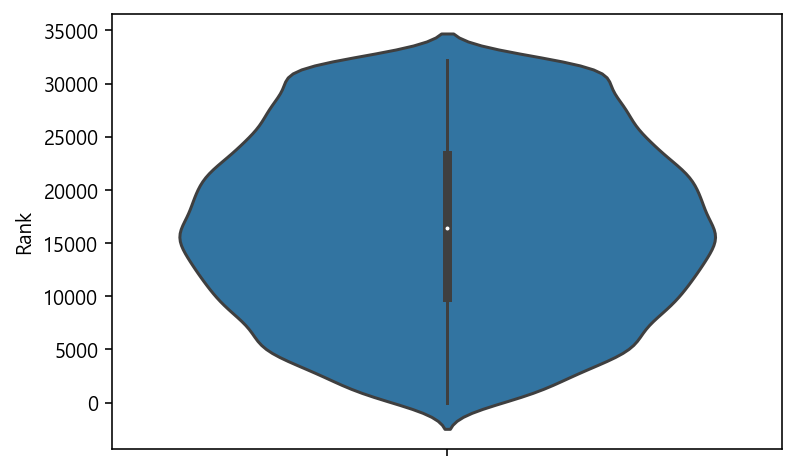

In [23]:
sns.violinplot(data=df, y='Rank')

In [24]:
df_under25 = df[df['Rank'] < 9983] # ①

In [25]:
diet_keyword1='다이어트'
diet_keyword2='다요'
diet_keyword3='다욧'

df_under25_diet = df_under25[(df_under25['title'].str.contains(diet_keyword1)) |\
                             (df_under25['title'].str.contains(diet_keyword2)) |\
                             (df_under25['title'].str.contains(diet_keyword3))]

df_under25_diet.sort_values(by='Rank')[:10] # ③



,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank
1684,이 맛에 운동하고 다이어트 하죠♡,148,17000.0,2021.10.13.,2021,10,13,수요일,30.0,20.0,50.0
1783,평생 다이어트~~ㅜㅜ,197,14000.0,2021.09.30.,2021,9,30,목요일,17.0,41.0,58.0
881,곤약 다이어트는 정말로 위험합니다,118,18000.0,2022.01.06.,2022,1,6,목요일,45.0,15.0,60.0
2549,다욧을 성공하고보니 다욧은 소식하는게 아니더라고요,126,12000.0,2021.07.19.,2021,7,19,월요일,41.0,60.0,101.0
11251,다이어트 성공인거죠??^^,112,12000.0,2019.07.13.,2019,7,13,토요일,50.5,60.0,110.5
5896,다이어트한의원(강남탑or선이고은)추천천해주세요,78,13000.0,2020.08.25.,2020,8,25,화요일,94.0,50.5,144.5
778,다이어트 할려면 이것만큼은 무조건 끊어야한다 말해주세요ㅜㅜ,132,8809.0,2022.01.16.,2022,1,16,일요일,39.0,111.0,150.0
16631,(일상) 간절한 질문 : 다이어트 어떻게 하세요?,156,8162.0,2022.03.22.,2022,3,22,화요일,26.0,126.0,152.0
137,(일상) 간절한 질문 : 다이어트 어떻게 하세요?,156,8161.0,2022.03.22.,2022,3,22,화요일,26.0,127.5,153.5
2209,다이어트 성공이후에 강박..,92,9364.0,2021.08.22.,2021,8,22,일요일,71.0,95.0,166.0


형태소 분석 - 명사 추출

In [26]:
okt = Okt()
komoran = Komoran()
twitter = Twitter()

sample_text = "영양제 먹으면서 걷기운동하니 살이 빠져요"

In [27]:
pprint(okt.pos(sample_text))

[('영', 'Modifier'),
 ('양제', 'Noun'),
 ('먹으면서', 'Verb'),
 ('걷기', 'Noun'),
 ('운동', 'Noun'),
 ('하니', 'Noun'),
 ('살이', 'Noun'),
 ('빠져요', 'Verb')]


In [28]:
pprint(komoran.pos(sample_text))

[('영양제', 'NNG'),
 ('먹', 'VV'),
 ('으면서', 'EC'),
 ('걷기', 'NNP'),
 ('운동', 'NNG'),
 ('하', 'XSV'),
 ('니', 'EC'),
 ('살', 'NNB'),
 ('이', 'JKS'),
 ('빠지', 'VV'),
 ('어요', 'EC')]


In [29]:
pprint(twitter.pos(sample_text))

[('영', 'Modifier'),
 ('양제', 'Noun'),
 ('먹으면서', 'Verb'),
 ('걷기', 'Noun'),
 ('운동', 'Noun'),
 ('하니', 'Noun'),
 ('살이', 'Noun'),
 ('빠져요', 'Verb')]


In [30]:
komoran.nouns(sample_text)

['영양제', '걷기', '운동', '살']

In [31]:
def get_kor_only(text):
    """한글, 영어, 숫자만 추출한다"""
    tmp = re.compile('[가-힣a-zA-Z0-9]+').findall(str(text)) #①
    result = ' '.join(tmp)                                   #②

    return result

text = "다이어트 도와주세요🙏 Diet, 9kg 감량 목표 ㅠ"
result = get_kor_only(text)

print(result) 

다이어트 도와주세요 Diet 9kg 감량 목표


In [32]:
df_under25_diet['re_title'] = df_under25_diet['title'].apply(lambda x:get_kor_only(x))
df_under25_diet.sample(3)

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank,re_title
125,수영 다이어트에 도움 되나요??,24,278.0,2022.03.23.,2022,3,23,수요일,704.5,8340.0,9044.5,수영 다이어트에 도움 되나요
3008,다이어트 비법 공유해주세요!ㅠㅠ,15,337.0,2021.06.03.,2021,6,3,목요일,1891.5,6867.5,8759.0,다이어트 비법 공유해주세요
16631,(일상) 간절한 질문 : 다이어트 어떻게 하세요?,156,8162.0,2022.03.22.,2022,3,22,화요일,26.0,126.0,152.0,일상 간절한 질문 다이어트 어떻게 하세요


In [33]:
diet_onesent = " ".join(df_under25_diet['re_title'].tolist()) # ①

nouns_diet = []
for noun in komoran.nouns(diet_onesent): # ②
    if len(noun)>1:
        nouns_diet.append(noun)
    else:
        continue

In [34]:
nouns_diet=[noun for noun in komoran.nouns(diet_onesent) if len(noun)>1]

In [35]:
nouns_diet

['다이어트',
 '다이어트',
 '땅콩 버터',
 '후기',
 '단기',
 '다이어트',
 '한약',
 '요트',
 '아침',
 '식단',
 '다이어트',
 '투자',
 '비용',
 '수영',
 '다이어트',
 '도움',
 '다이어트',
 '일상',
 '질문',
 '다이어트',
 '다이어트',
 '성공',
 '키로',
 '필라테스',
 '다이어트',
 '효과',
 '체중',
 '정체',
 '다이어트',
 '방법',
 '공유',
 '부탁',
 '다이어트',
 '질문',
 '다이어트',
 '성공의 비밀',
 '갑상선',
 '기능',
 '저하',
 '다이어트',
 '다이어트',
 '도전',
 '한약',
 '다이어트',
 '신분',
 '다이어트',
 '간식',
 '과일',
 '프로',
 '다이어트',
 '보조',
 '다이어트',
 '필라테스',
 '헬스',
 '필요',
 '한곳',
 '다이어트',
 '점핑',
 '다이어트',
 '다이어트',
 '한약',
 '부작용',
 '다이어트',
 '제일',
 '운동',
 '다이어트',
 '옆구리',
 '사진',
 '다이어트',
 '생리',
 '지연',
 '다이어트',
 '하시나',
 '다이어트',
 '시작',
 '공유',
 '다이어트',
 '가슴',
 '다이어트',
 '포만감',
 '다이어트',
 '다이어트',
 '방법',
 '단기간',
 '다이어트',
 '방법',
 '다이어트',
 '다이어트',
 '효과',
 '요즘',
 '다이어트',
 '속지',
 '다이어트',
 '작심',
 '삼일',
 '다이어트',
 '엄마',
 '다이어트',
 '식단',
 '만원',
 '가량',
 '효과',
 '다이어트',
 '다이어트',
 '위험',
 '한약',
 '다이어트',
 '효과',
 '중턱',
 '다이어트',
 '걷기',
 '운동',
 '시간',
 '다이어트',
 '임신',
 '다이어트',
 '하시나',
 '다이어트',
 '시작',
 '약국',
 '다이어트',
 '한자리',
 '다이어트',
 '효과',
 '추천',
 '부탁',
 '다이어트'

In [36]:
Counter(nouns_diet).most_common()

[('다이어트', 580),
 ('한약', 68),
 ('효과', 41),
 ('식단', 34),
 ('추천', 28),
 ('시작', 26),
 ('성공', 25),
 ('방법', 20),
 ('운동', 19),
 ('키로', 18),
 ('신분', 16),
 ('약사', 16),
 ('아줌마', 15),
 ('보조', 14),
 ('일차', 13),
 ('가요', 13),
 ('후기', 12),
 ('감량', 12),
 ('의원', 12),
 ('오늘', 10),
 ('부탁', 9),
 ('노하우', 9),
 ('공유', 8),
 ('개월', 8),
 ('유지', 8),
 ('도움', 7),
 ('단기간', 7),
 ('질문', 6),
 ('하시나', 6),
 ('평생', 6),
 ('한방', 6),
 ('요트', 5),
 ('필라테스', 5),
 ('정체', 5),
 ('부작용', 5),
 ('요즘', 5),
 ('간헐', 5),
 ('주차', 5),
 ('고민', 5),
 ('요요', 5),
 ('단기', 4),
 ('체중', 4),
 ('점핑', 4),
 ('제일', 4),
 ('디톡스', 4),
 ('식욕', 4),
 ('산후', 4),
 ('몸무게', 4),
 ('단식', 4),
 ('조언', 4),
 ('저녁', 4),
 ('아침', 3),
 ('간식', 3),
 ('걷기', 3),
 ('시간', 3),
 ('킬로', 3),
 ('건강', 3),
 ('병원', 3),
 ('이후', 3),
 ('점심', 3),
 ('출산', 3),
 ('비법', 3),
 ('정도', 3),
 ('프로그램', 3),
 ('처방', 3),
 ('비만', 3),
 ('계세', 3),
 ('계단', 3),
 ('경험', 3),
 ('음식', 3),
 ('최고', 3),
 ('고지', 3),
 ('관리', 3),
 ('오일', 3),
 ('조절', 3),
 ('결심', 3),
 ('면역력', 3),
 ('방식', 3),
 ('남편', 3),
 ('땅콩 버터', 2),
 (

In [37]:
pt_keyword1='운동'
pt_keyword2='필라'
pt_keyword3='헬스'
pt_keyword4='요가'
pt_keyword5='피티'
pt_keyword6='PT'

df_under25_pt = df_under25[(df_under25['title'].str.contains(pt_keyword1)) |\
          (df_under25['title'].str.contains(pt_keyword2)) |\
          (df_under25['title'].str.contains(pt_keyword3)) |\
          (df_under25['title'].str.contains(pt_keyword4)) |\
          (df_under25['title'].str.contains(pt_keyword5)) |\
          (df_under25['title'].str.contains(pt_keyword6))]

df_under25_pt.sort_values(by='Rank')[:10]

,title,replys,views,date,year,month,day,Date_Created,reply_rank,view_rank,Rank
1684,이 맛에 운동하고 다이어트 하죠♡,148,17000.0,2021.10.13.,2021,10,13,수요일,30.0,20.0,50.0
1904,피티받을때 트레이너들이 원래,71,14000.0,2021.09.18.,2021,9,18,토요일,100.5,41.0,141.5
3545,필라테스. 피티 레깅스 입을때 팬티 ㅠㅠ,56,9804.0,2021.04.13.,2021,4,13,화요일,146.5,86.0,232.5
918,걷기운동 1시간씩 다이어트되나요?,68,8116.0,2022.01.03.,2022,1,3,월요일,109.5,129.0,238.5
10611,필라테스 강사전망,28,4768.0,2019.08.26.,2019,8,26,월요일,491.5,243.0,734.5
6323,한달동안 운동 없이 살 빼려면요,29,1702.0,2020.07.17.,2020,7,17,금요일,457.5,678.0,1135.5
10204,살 빼려고 매일 걷기운동하고 있어요~ 실패없이 성공하는 노하우 뭘까요?,32,1492.0,2019.09.27.,2019,9,27,금요일,379.0,801.0,1180.0
8521,이런 뒷태가 좋아지기 위해서는 어떤 운동을해야할까요?ㅠ,24,1729.0,2020.02.01.,2020,2,1,토요일,704.5,660.0,1364.5
7717,다이어트 조언해주세요!운동해도 안빠짐..,59,1091.0,2020.03.31.,2020,3,31,화요일,137.5,1271.5,1409.0
4302,헬스장 PT 가격.. 원래 이런건가요,17,12000.0,2021.02.03.,2021,2,3,수요일,1458.5,60.0,1518.5


In [38]:
df_under25_pt['re_title'] = df_under25_pt['title'].apply(lambda x:get_kor_only(x))

In [39]:
pt_onesent = " ".join(df_under25_pt['re_title'].tolist())
nouns_pt = [noun for noun in komoran.nouns(pt_onesent) if len(noun) > 1]

In [40]:
Counter(nouns_pt).most_common()[:10]

[('운동', 106),
 ('필라테스', 47),
 ('다이어트', 23),
 ('효과', 18),
 ('헬스', 15),
 ('요가', 14),
 ('기구', 10),
 ('정도', 8),
 ('걷기', 7),
 ('근력', 7)]

In [41]:
keyword1='운동'
keyword2='필라'
keyword3='다이어트'
keyword4='헬스'
keyword5='요가'

df_under25_others = df_under25[~(df_under25['title'].str.contains(keyword1)) &\
                               ~(df_under25['title'].str.contains(keyword2)) &\
                               ~(df_under25['title'].str.contains(keyword3)) &\
                               ~(df_under25['title'].str.contains(keyword4)) &\
                               ~(df_under25['title'].str.contains(keyword5))]

In [42]:
df_under25_others['re_title'] = df_under25_others['title'].apply(lambda x:get_kor_only(x))

other_onesent = " ".join(df_under25_others['re_title'].tolist())
nouns_other = [noun for noun in komoran.nouns(other_onesent) if len(noun) > 1]

Counter(nouns_other).most_common()[:60]

[('추천', 202),
 ('효과', 129),
 ('피부', 120),
 ('관리', 114),
 ('수술', 102),
 ('가요', 91),
 ('신분', 75),
 ('크림', 75),
 ('지방', 69),
 ('얼굴', 67),
 ('주사', 62),
 ('키로', 61),
 ('주름', 50),
 ('여드름', 50),
 ('방법', 50),
 ('기미', 49),
 ('치료', 47),
 ('부탁', 46),
 ('고민', 43),
 ('마스크', 43),
 ('유산', 43),
 ('가슴', 42),
 ('후기', 40),
 ('시술', 40),
 ('레이저', 39),
 ('눈밑', 39),
 ('머리', 39),
 ('제거', 39),
 ('사진', 38),
 ('필러', 37),
 ('보톡스', 37),
 ('질문', 34),
 ('때문', 33),
 ('병원', 33),
 ('피부과', 32),
 ('탈모', 29),
 ('영양제', 29),
 ('샴푸', 29),
 ('뱃살', 27),
 ('화장품', 27),
 ('재배', 26),
 ('식욕', 26),
 ('눈썹', 26),
 ('헤어', 26),
 ('쌍수', 25),
 ('개월', 25),
 ('30대', 25),
 ('남편', 24),
 ('부작용', 24),
 ('노하우', 24),
 ('요즘', 24),
 ('감량', 24),
 ('콜라겐', 23),
 ('하시나', 23),
 ('단식', 23),
 ('사용', 23),
 ('팔자', 23),
 ('제품', 23),
 ('문신', 23),
 ('간헐', 22)]

In [43]:
other_onesent = " ".join(df_under25_others['re_title'].tolist())
Counter(other_onesent.split()).most_common()[:60]

[('어떻게', 95),
 ('추천해주세요', 87),
 ('분', 84),
 ('있나요', 66),
 ('효과', 62),
 ('좀', 54),
 ('계신가요', 49),
 ('너무', 47),
 ('있을까요', 46),
 ('추천', 44),
 ('진짜', 43),
 ('피부', 41),
 ('혹시', 40),
 ('해보신분', 37),
 ('수술', 36),
 ('얼굴', 35),
 ('관리', 35),
 ('잘', 33),
 ('많이', 33),
 ('알려주세요', 33),
 ('분들', 33),
 ('후', 32),
 ('좋은', 32),
 ('하세요', 30),
 ('봐주세요', 29),
 ('더', 29),
 ('뭐가', 29),
 ('다들', 28),
 ('방법', 27),
 ('보톡스', 27),
 ('유산균', 27),
 ('저', 26),
 ('레이저', 25),
 ('피부관리', 25),
 ('살', 25),
 ('어떤가요', 25),
 ('아시는분', 24),
 ('후기', 23),
 ('살이', 23),
 ('리프팅', 23),
 ('요즘', 23),
 ('같아요', 23),
 ('어떤거', 23),
 ('받고', 22),
 ('기미', 22),
 ('시술', 22),
 ('해주세요', 22),
 ('여드름', 22),
 ('눈밑지방재배치', 21),
 ('피부과', 21),
 ('영양제', 21),
 ('슈링크', 21),
 ('하시나요', 21),
 ('노하우', 20),
 ('어때요', 20),
 ('부탁드려요', 19),
 ('있으신가요', 18),
 ('좋을까요', 18),
 ('왜', 18),
 ('정말', 18)]

### 명사 추가하기

In [44]:
new_nouns_dict = './data/신규명사사전.txt'
komoran_add = Komoran(userdic=new_nouns_dict)

In [45]:
sample_nouns_text = '이번에 나온 홍삼젤리가 참 맛있네요.'
print("기본 명사 사전 적용 후 명사 추출 :", komoran.nouns(sample_nouns_text))
print("명사 추가 후 명사 추출 :",komoran_add.nouns(sample_nouns_text))

기본 명사 사전 적용 후 명사 추출 : ['이번', '홍삼', '젤리']
명사 추가 후 명사 추출 : ['이번', '홍삼젤리']


In [46]:
other_onesent = " ".join(df_under25_others['re_title'].tolist())
Counter(other_onesent.split()).most_common()[:60]

[('어떻게', 95),
 ('추천해주세요', 87),
 ('분', 84),
 ('있나요', 66),
 ('효과', 62),
 ('좀', 54),
 ('계신가요', 49),
 ('너무', 47),
 ('있을까요', 46),
 ('추천', 44),
 ('진짜', 43),
 ('피부', 41),
 ('혹시', 40),
 ('해보신분', 37),
 ('수술', 36),
 ('얼굴', 35),
 ('관리', 35),
 ('잘', 33),
 ('많이', 33),
 ('알려주세요', 33),
 ('분들', 33),
 ('후', 32),
 ('좋은', 32),
 ('하세요', 30),
 ('봐주세요', 29),
 ('더', 29),
 ('뭐가', 29),
 ('다들', 28),
 ('방법', 27),
 ('보톡스', 27),
 ('유산균', 27),
 ('저', 26),
 ('레이저', 25),
 ('피부관리', 25),
 ('살', 25),
 ('어떤가요', 25),
 ('아시는분', 24),
 ('후기', 23),
 ('살이', 23),
 ('리프팅', 23),
 ('요즘', 23),
 ('같아요', 23),
 ('어떤거', 23),
 ('받고', 22),
 ('기미', 22),
 ('시술', 22),
 ('해주세요', 22),
 ('여드름', 22),
 ('눈밑지방재배치', 21),
 ('피부과', 21),
 ('영양제', 21),
 ('슈링크', 21),
 ('하시나요', 21),
 ('노하우', 20),
 ('어때요', 20),
 ('부탁드려요', 19),
 ('있으신가요', 18),
 ('좋을까요', 18),
 ('왜', 18),
 ('정말', 18)]

### 트윗데이터 불러오기

In [47]:
df_tweet = pd.read_excel('./data/다이어트_트윗.xlsx')

In [48]:
df_tweet.sample(3)

,Created At,Hashtags,Tweets
192,Sat Jun 04 04:42:53 +0000 2022,[],생각해보면 할게 존나 잔뜩있네 다이어트도해야함 임플란트도해야함 피부과치료도받아야함 ...
209,Sat Jun 04 04:37:20 +0000 2022,[],시잘 ㅡㅡ발 ㅌ다이어트해야자ㅜㅜㅜㅜㅜㅜㅇ진짜빡쳐개짜증남
587,Sat Jun 04 02:42:23 +0000 2022,[],RT @euncho__: 운동에 미쳐가는 과정\n\n입문-진짜 솔직히 너무 가기 싫...


### 데이터 전처리 - 맞춤법 교정

In [49]:
from hanspell import spell_checker

In [50]:
text = "해봤자 안돼는 다이어트 하지말고 저녁이나먹자"

In [51]:
print(spell_checker.check(text))

Checked(result=True, original='해봤자 안돼는 다이어트 하지말고 저녁이나먹자', checked='해봤자 안되는 다이어트하지 말고 저녁이나 먹자', errors=3, words=OrderedDict([('해봤자', 0), ('안되는', 1), ('다이어트하지', 2), ('말고', 2), ('저녁이나', 2), ('먹자', 2)]), time=0.3349940776824951)


In [52]:
print(spell_checker.check(text).checked)

해봤자 안되는 다이어트하지 말고 저녁이나 먹자


In [53]:
def get_kor_text(text):
    """한글만 추출한다"""
    tmp = re.compile('[가-힣]+').findall(str(text))
    result = ' '.join(tmp)
    
    return result

In [54]:
df_tweet['re_Tweet'] = df_tweet['Tweets'].apply(lambda x:get_kor_text(x))

In [55]:
df_tweet.sample(3)

,Created At,Hashtags,Tweets,re_Tweet
271,Sat Jun 04 04:22:55 +0000 2022,[],"이렇게만 들으면 정말 좋을 것 같은데 그동안 엄청나게 예쁜 여자, 트로피 와이프 전...",이렇게만 들으면 정말 좋을 것 같은데 그동안 엄청나게 예쁜 여자 트로피 와이프 전형...
256,Sat Jun 04 04:26:23 +0000 2022,[],1K3J\n\n건대출장샵 건대출장샵 다이어트일기 인제군안마,건대출장샵 건대출장샵 다이어트일기 인제군안마
593,Sat Jun 04 02:40:38 +0000 2022,"[{'text': 'YetToCome', 'indices': [96, 106]}, ...",RT @Jj33112634: 다이어트 비빔국수?ㅋ\n를가장한..😚\nThe worl...,다이어트 비빔국수 를가장한


In [56]:
def checkGrammer(text):
    """문법교정한다"""    
    
    txt = spell_checker.check(text)
    result = txt.checked
    
    return result

In [57]:
df_tweet['check_Tweet']=df_tweet['re_Tweet'].apply(lambda x:checkGrammer(x))

In [58]:
df_tweet.sample(3)

,Created At,Hashtags,Tweets,re_Tweet,check_Tweet
356,Sat Jun 04 03:59:21 +0000 2022,[],구글해봤는데 헌혈하면서 등록하는게 기본절차인가봐 일단 다이어트하는 기간동안에는 포기...,구글해봤는데 헌혈하면서 등록하는게 기본절차인가봐 일단 다이어트하는 기간동안에는 포기...,구글 해봤는데 헌혈하면서 등록하는 게 기본 절차인가 봐 일단 다이어트하는 기간 동안...
979,Sat Jun 04 00:50:59 +0000 2022,[],"4월, 다이어트를 처음 시작하던 때\n날씨가 그리 덥지 않았지만 회사까지 걸어오면 ...",월 다이어트를 처음 시작하던 때 날씨가 그리 덥지 않았지만 회사까지 걸어오면 땀으로...,월 다이어트를 처음 시작하던 때 날씨가 그리 덥지 않았지만 회사까지 걸어오면 땀으로...
482,Sat Jun 04 03:18:29 +0000 2022,[],ㅋㅋ그치만 미로의 전사에서 어라? 너 뭘.. 먹고 지낸 거야? 같은 기분되서 ㅋㅋ ...,그치만 미로의 전사에서 어라 너 뭘 먹고 지낸 거야 같은 기분되서 어딜 조사해도 당...,그렇지만 미로의 전사에서 어라 너 뭘 먹고 지낸 거야 같은 기분 돼서 어딜 조사해도...


### 데이터 전처리 - 명사 추출

In [59]:
komoran = Komoran()

df_tweet.drop_duplicates(subset='check_Tweet', inplace=True)
tweet_onesent = " ".join(df_tweet['check_Tweet'].to_list())
nouns_tweets = [noun for noun in komoran.nouns(tweet_onesent) if len(noun) > 1]

In [60]:
nouns_tweets[:3]

['엄마', '다이어트', '잔소리']

### 데이터 분석 - nGram

In [61]:
def getGram(tokens, n):
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams =[]
    for i in range(0, int(len(tokens)/n)):
        bigrams.append(tokens[i:i+n])
        
    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)
    
    return ngram_result

In [62]:
n2gram_result = getGram(tokens=nouns_tweets, n=2)
n3gram_result = getGram(tokens=nouns_tweets, n=3)

In [63]:
display(n2gram_result.head(15))
display(n3gram_result.head(15))

,index,nGram
0,다이어트 다이어트,25
1,알바 직원,9
2,직원 알바,9
3,다이어트 시작,8
4,다이어트 식단,7
5,강제 다이어트,7
6,활동 일환,6
7,쿠팡 활동,6
8,다이어트 간식,6
9,다이어트 그램,5


,index,nGram
0,알바 직원 알바,6
1,쿠팡 활동 일환,4
2,일정액 수수료 제공,3
3,일환 일정액 수수료,3
4,활동 일환 일정액,3
5,다이어트 뱃살 운동,2
6,음식 다이어트 음식,2
7,뱃살 운동 뱃살,2
8,운동 뱃살 제거,2
9,다이어트 알바 직원,2


### 국민 건강 보험 공단에서 제공하는 진료 내역 정보 데이터 분석하기

In [64]:
df = pd.read_csv('./data/2020년_진료정보_전처리완료.csv')

In [65]:
df.head(2)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,총처방일수,심결본인부담금,진료과목코드_str,진료과목,진단병명,성별,연령대
0,1,17,1,I109,E785,0,1500,1,내과,기타 및 상세불명의 원발성 고혈압,남,80대
1,1,17,1,I109,E785,7,1500,1,내과,기타 및 상세불명의 원발성 고혈압,남,80대


In [66]:
selct_cols = ['성별','연령대','진료과목','진단병명']
df_selct = df[selct_cols] #①

df_female = df_selct[(df_selct['성별']=='여')&\
                     ((df_selct['연령대']=='20대')|\
                      (df_selct['연령대']=='30대')|\
                      (df_selct['연령대']=='40대')|\
                      (df_selct['연령대']=='50대'))] #②
df_female.sample(5)

,성별,연령대,진료과목,진단병명
5565116,여,50대,마취통증의학과,"경추통, 경흉추부"
1645054,여,40대,정형외과,내측상과염
2816557,여,50대,내과,만성 신장병(5기)
3297066,여,40대,산부인과,알수없음
5900015,여,40대,신경과,삼차신경통


In [67]:
df_female_ca=pd.pivot_table(data=df_female,
                         values='진단병명', #①
                         aggfunc='count', #②
                         index='진료과목', #③
                         columns='연령대') #④

df_female_ca.sort_values(by='20대',ascending=False).head(10) #⑤

연령대,20대,30대,40대,50대
진료과목,,,,
내과,95620.0,134645.0,211344.0,377619.0
산부인과,75011.0,125792.0,76641.0,59789.0
정형외과,52167.0,68929.0,133092.0,259573.0
이비인후과,48287.0,71874.0,71711.0,75122.0
피부과,46510.0,40332.0,45657.0,51417.0
안과,33327.0,33712.0,48359.0,79775.0
정신건강의학과,30550.0,28909.0,31831.0,33186.0
외과,12089.0,17755.0,31028.0,46265.0
비뇨기과,10169.0,11482.0,17345.0,23770.0


In [68]:
df_female_ca_1 = df_female_ca.reset_index() #①

df_female_ca_20 = df_female_ca_1[['진료과목','20대']].sort_values(by='20대', ascending=False)[:10] #②
df_female_ca_30 = df_female_ca_1[['진료과목','30대']].sort_values(by='30대', ascending=False)[:10]
df_female_ca_40 = df_female_ca_1[['진료과목','40대']].sort_values(by='40대', ascending=False)[:10]
df_female_ca_50 = df_female_ca_1[['진료과목','50대']].sort_values(by='50대', ascending=False)[:10]

df_female_ca_2030 = pd.merge(df_female_ca_20, df_female_ca_30, 
                                                    on='진료과목', how='outer') #③
df_female_ca_2040 = pd.merge(df_female_ca_2030, df_female_ca_40,
                                                    on='진료과목', how='outer')
df_female_ca_2050 = pd.merge(df_female_ca_2040, df_female_ca_50,
                                                    on='진료과목', how='outer')

df_female_ca_2050.head(10)

연령대,진료과목,20대,30대,40대,50대
0,내과,95620.0,134645.0,211344.0,377619.0
1,산부인과,75011.0,125792.0,76641.0,59789.0
2,정형외과,52167.0,68929.0,133092.0,259573.0
3,이비인후과,48287.0,71874.0,71711.0,75122.0
4,피부과,46510.0,40332.0,45657.0,51417.0
5,안과,33327.0,33712.0,48359.0,79775.0
6,정신건강의학과,30550.0,28909.0,31831.0,33186.0
7,외과,12089.0,17755.0,31028.0,46265.0
8,비뇨기과,10169.0,11482.0,17345.0,NaN
9,응급의학과,8170.0,NaN,NaN,NaN


In [69]:
df_female_ca_2050.style.background_gradient(cmap='summer')

연령대,진료과목,20대,30대,40대,50대
0,내과,95620.000000,134645.000000,211344.000000,377619.000000
1,산부인과,75011.000000,125792.000000,76641.000000,59789.000000
2,정형외과,52167.000000,68929.000000,133092.000000,259573.000000
3,이비인후과,48287.000000,71874.000000,71711.000000,75122.000000
4,피부과,46510.000000,40332.000000,45657.000000,51417.000000
5,안과,33327.000000,33712.000000,48359.000000,79775.000000
6,정신건강의학과,30550.000000,28909.000000,31831.000000,33186.000000
7,외과,12089.000000,17755.000000,31028.000000,46265.000000
8,비뇨기과,10169.000000,11482.000000,17345.000000,nan
9,응급의학과,8170.000000,nan,nan,nan


Text(0.5, 1.0, '20대부터 50대 여성들이 내원하는 상위 진료과목')

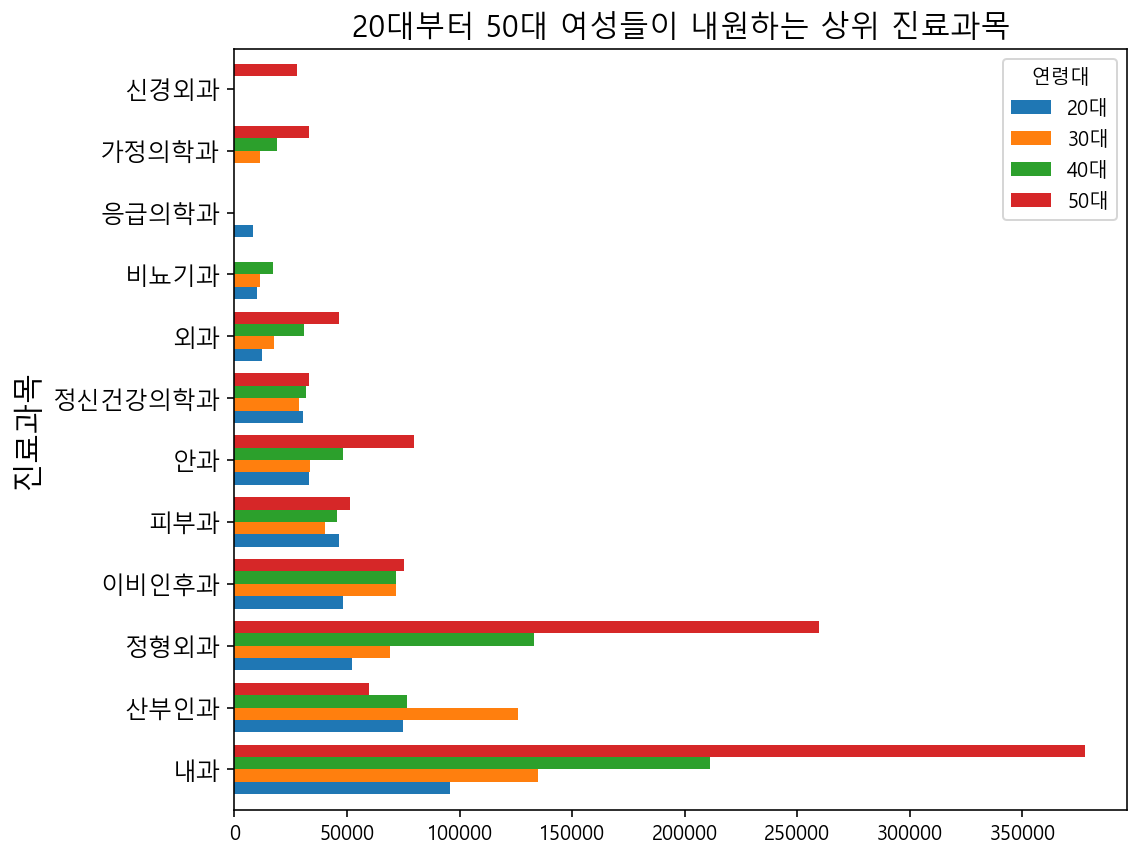

In [70]:
df_bargraph = df_female_ca_2050.sort_values(by='20대', 
                                       ascending=False)
df_bargraph.set_index('진료과목', inplace=True) #①

df_bargraph.plot.barh(figsize=(8, 7), width=0.8) #②
plt.yticks(fontsize=12)
plt.ylabel("진료과목", fontsize=15) 
plt.title("20대부터 50대 여성들이 내원하는 상위 진료과목", fontsize=15)

In [71]:
diag_data_s = df_female[df_female['진료과목']=='정형외과'] #①

diag_data_s_ca = pd.pivot_table(data=diag_data_s, values = '진료과목',
                                aggfunc='count', index='진단병명', columns='연령대') #②
diag_data_s_ca.sort_values(by='30대', ascending=False)[:15].style.background_gradient(cmap='summer') 

연령대,20대,30대,40대,50대
진단병명,,,,
"경추통, 경부",2424.000000,3319.000000,4501.000000,5316.000000
요추의 염좌 및 긴장,2426.000000,3264.000000,4952.000000,6858.000000
"요통, 요추부",2131.000000,3059.000000,4670.000000,7427.000000
경추의 염좌 및 긴장,2032.000000,2692.000000,3854.000000,4015.000000
신경뿌리병증을 동반한 요추 및 기타 추간판장애(G55.1*),1056.000000,2469.000000,4298.000000,8518.000000
발목의 기타 부분의 염좌 및 긴장,1857.000000,1339.000000,1185.000000,1485.000000
신경뿌리병증을 동반한 경추간판장애,433.000000,956.000000,3567.000000,5934.000000
손톱의 손상이 없는 손가락의 열린상처,843.000000,956.000000,1319.000000,1506.000000
알수없음,794.000000,912.000000,1431.000000,2179.000000
